# Pricing Asian and Basket Options Via Taylor Expansion

## Paper information

Ju, N. (2002). Pricing Asian and Basket Options Via Taylor Expansion. Journal of Computational Finance, 5(3), 79–103. https://doi.org/10.21314/JCF.2002.088

## Abstract

Asian options belong to the so-called path-dependent derivatives. They are among the most difficult to price and hedge both analytically and numerically. Basket options are even harder to price and hedge because of the large number of state variables. Several approaches have been proposed in the literature, including Monte Carlo simulations, tree-based methods, partial differential equations, and analytical approximations among others. The last category is the most appealing because most of the other methods are very complex and slow. Our method belongs to the analytical approximation class. It is based on the observation that though the weighted average of lognormal variables is no longer lognormal, it can be approximated by a lognormal random variable if the ¯rst two moments match the true ¯rst two moments. To have a better approximation, we consider the Taylor expansion of the ratio of the characteristic function of the average to that of the approximating lognormal random variable around zero volatility. We include terms up to ¾6 in the expansion. The resulting option formulas are in closed form. We treat discrete Asian option as a special case of basket options. Formulas for continuous Asian options are obtained from their discrete counterpart. Numerical tests indicate that the formulas are very accurate. Comparisons with all other leading analytical approximations show that our method has performed the best overall in terms of accuracy for both short and long maturity options. Furthermore, unlike some other methods, our approximation treats basket (portfolio) and Asian options in a unified way. Lastly, in the appendix we point out a serious mathematical error of a popular method of pricing Asian options in the literature.

## Skeleton of model derivation

1. **The Price of Portfolio**：
     +  Since we have the SDE:  
      $$ \frac{dS_{it}}{S_{it}} = g_idt+\sigma_i dB_t$$, where $g_i =r-\delta_i$, r is the riskless interest rate, $\delta_i$ is the dividend yield, $\sigma_i$ the volatility
     + For every asset in basket options we have:    
      $$ S_i (t) = S_i e^{(g_i-\sigma_i^2/2)t+\sigma_i w_i(t)}, i = 1, 2, ..., N$$
     + Using $z$ to scale the volitilites, we have:    
      $$S_i(z,t) = S_i e^{(g_i-z^2\sigma_i^2/2)t+z\sigma_i w_i(t)}$$
     + So the price of  portfolio can be expressed as:     
      $$A(z) =  \sum_{i=1}^{N}\chi_i S_i(z,T) = \sum_{i=1}^{N}\chi_i S_i e^{(g_i-z^2\sigma_i^2/2)t+z\sigma_i w_i(t)}$$ when z=1, we get the price we want.
     * Payoff of a basket option is:  
      $$BC(T)=(A(1)-K)^+$$

2.  **Set Up for Taylor Expansion**:
    * Since $A(z)$ is the sum of log normal distributions, we can approximate its distribution using a lognormal distribution (Levy,1992). That is why we care about the first and second moment of it.
        * we find the first and second moments of $A(z)$ as following:  
          \begin{aligned}
          &U_1= \sum_{i=1}^N \overline{S}_i=A(0) \\   
          &U_2(z^2)= \sum_{i,j=1}^N \overline{S}_i\overline{S}_je^{z^2\overline{\rho}_{ij}}\\
          \end{aligned}
        * $Y(z)$is a normal distribution,with mean $m(z^2)$,variance $v(z^2)$.let $U_1 = e^{m(z^2)+v(z^2)/2}$,$U_2 = e^{2m(z^2)+2v(z^2)}$, we have  
          \begin{aligned}
          &m(z^2)=2log(U_1)-1/2log(U_2(z^2)) \\ 
          &v(z^2)=log(U_2(z^2))-2log(U_1) \\ 
          \end{aligned}
        * so we define $X(z)=log(A(z))$ and try to find the pdf of $X$
      &emsp;
    * Consider
    $$E[e^{i\phi X(z)}]=E[e^{i\phi Y(z)}]\frac{E[e^{i\phi X(z)}]}{E[e^{i\phi Y(z)}]}=E[e^{i\phi Y(z)}]f(z)$$
    $$f(z)=\frac{E[e^{i\phi X(z)}]}{E[e^{i\phi Y(z)}]}$$
    $E[e^{i\phi Y(z)}]$ is the characteristic function of the normal variable and $f(z)$ is the ratio of the characteristic function of $X(z)$ to that of $Y(z)$, we have
     $$f(z)=E[e^{i\phi X(z)}]e^{-i \phi m(z^2)+\phi^2v(z^2)/2}$$    
     &emsp;
    * Expand $f(z)$ up to $z^6$, method: expand $E(e^{i\phi X(z)})$ and $e^{-i\phi m(z^2)+\phi^2v(z^2)/2}$ respectively and then multiply them.   
    &emsp;
        * we expand $e^{-i\phi m(z^2)+\phi^2v(z^2)/2}$ by expanding $y=-i\phi m(z^2)+\phi^2v(z^2)$ to the 3rd, with the expansion of $e^y$, we get:
        $$e^{-i\phi m(0)+\phi^2v(0)/2} \approx e^{-i\phi m(0)+\phi^2v(0)/2}(1-(i\phi+\phi^2)a_1+((i\phi+\phi^2)^2a_1^2-(i\phi+\phi^2)a_2)/2+(3(i\phi+\phi^2)^2a_1a_2-(i\phi+\phi^2)a_3-(i\phi+\phi^2)^3a_1^3)/6)$$
        * since the odd order derivative is 0, we need the 2nd, 4th and 6th derivitives of $g(z)=E(e^{i\phi X(z)})$ to get the value
        $$g(z)\approx g(0)+\frac{z^2}{2}g^{''}(0)+\frac{z^4}{24}g^{(4)}(0)+\frac{z^6}{720}g^{(6)}(0)$$
        * then the expansion of  $E[e^{i\phi X(1)}]$ is: 
        $$E[e^{i\phi X(1)}]=e^{i \phi m(1)-\phi^2v(1)/2}(1−i\phi d_1(z)-\phi^2d_2(z)+i\phi^3d_3(z)+\phi^4d_4(z))$$
    *Now we multiply the two results, and we get the Taylor expansion for $f(z)$   
    $$f(z)\approx 1−i\phi d_1(z)-\phi^2d_2(z)+i\phi^3d_3(z)+\phi^4d_4(z)$$

3.  **Derive the Option Value**:
    * The value of the option can be expressed as: $BC(T) = (A(1)-K)^+$
    * The pdf of $X$ is given by $h(x)$
    $$h(x)=p(x)+(d_1(1)\frac{d}{dx}+d_2(1)\frac{d^2}{dx^2}+d_3(1)\frac{d^3}{dx^3}+d_4(1)\frac{d^4}{dx^4})p(x)$$
    where $p(x)=\frac{1}{\sqrt{2\pi v(1)}}e^{-\frac{(x-m(1))^2}{2v(1)}}$
    * So the expectation of $[e^{X(1)}-K]^+$ is the price of the option
    * The final option price is: $$ BC = e^{-rT} E[e^{X(1)}-K]^+ = [U_1e^{-rT}N(y_1)-Ke^{-rT}N(y_2)]+[e^{-rT}K(z_1p(y)+z_2\frac{dp(y)}{dy}+z_3\frac{d^2p(y)}{dy^2})]  \tag{1}$$ 
    where $y = log(K)$, $y_1 = \frac{m(1)-y}{\sqrt{v(1)}}+\sqrt{v(1)}$, $y_2 = y_1-\sqrt{v(1)}$, and $z_1 = d_2(1) - d_3(1) +d_4(1)$, $z_2 = d_3(1) - d_4(1)$, $z_3 = d_4(1)$ 
    * By the put-call parity, we have price of put option(There may be some typos in Ju's paper) 
    $$ BP=e^{-rT}K-e^{-rT}U_1+BC $$ 

## Implementation of the model

From the analysis above we decide that our implementation should based on (1), so we need the value of parameters in (1) directly, the function of  $d_i$ and $p(\cdot)$
  * The value of $d_i$ is depend on $a_i$, $b_i$ and $c_i$, where 
    \begin{aligned}
    &a_1(z)= -\frac{z^2U^{'}_2(0)}{2U_2(0)}\\
    &a_2(z)= 2a^2_1-\frac{z^4U^{''}_2(0)}{2U_2(0)}\\
    &a_3(z)= 6a_1a_2-4a^3_1-\frac{z^6U^3_2(0)}{2U_2(0)}\\
    &b_1(z) = \frac{z^4}{4A^3(0)}E[A^{'2}(0)A^{''}(0)]\\
    &b_2(z) = a^2_1(z) - a_2(z)/2\\
    &c_1(z) = -a_1(z)b_1(z)\\
    &c_2(z) = \frac{z^6}{144A^4(0)}(9E[A^{'2}(0)A^{''}(0)]+4E[A^{'3}(0)A^{3}(0)])\\
    &c_3(z) = \frac{z^6}{48A^3(0)}(4E[A^{'2}(0)A^{''}(0)A^{3}(0)]+4E[A^{''3}(0)])\\
    &c_4(z) = a_1(z)a_2(z)-\frac{2}{3}a^3_1(z)-\frac{1}{6}a_3(z)\\
    \end{aligned}
  * It is worth noticing that we can define $\overline{A}_k = \sum^{N}_{t=1}\overline{S}_i\overline{\rho}_{ik}$ to simplify the calculation.So we can obtain the value of $d_i$ as:
    \begin{aligned}
    &d_1(z) = \frac{1}{2}(6a^2_1(z)+a_2(z)-4b_1(z)+2b_2(z))-\frac{1}{6}(120a^3_1(z)-a_3(z)+6(24c_1(z)-6c_2(z)+2c_3(z)-c_4(z)))\\
    &d_2(z) = \frac{1}{2}(10a^2_1(z)+a_2(z)-6b_1(z)+2b_2(z))-(128a^3_1(z)/3-a_3(z)/6+2a_1(z)b_1(z)-a_1(z)b_2(z)+50c_1(z)-11c_2(z)+3c_3(z)-c_4(z))\\
    &d_3(z) = (2a^2_1(z)-b_1(z))-\frac{1}{3}(88a^3_1(z)+3a_1(z)(5b_1(z)-2b_2(z))+3(35c_1(z)-6c_2(z)+c_3(z)))\\
    &d_4(z) = (-20a^3_1(z)/3+a_1(z)(-4b_1(z)+b_2(z))-10c_1(z)+c_2(z))\\
    \end{aligned}

  * For parameters in (1) we have $y = log(K)$, $y_1 = \frac{m(1)-y}{\sqrt{v(1)}}+\sqrt{v(1)}$, $y_2 = y_1-\sqrt{v(1)}$, and $z_1 = d_2(1) - d_3(1) +d_4(1)$, $z_2 = d_3(1) - d_4(1)$, $z_3 = d_4(1)$ 
  * And we know $p(x)=\frac{1}{\sqrt{2\pi v(1)}}e^{-\frac{(x-m(1))^2}{2v(1)}}$ so we can write our code.

## Approximation for the Asian Options

1. **Approximation for the discrete Asian Options**:
   * $A=\sum_{i=1}^N \frac{1}{N}Se^{(g-\sigma^2/2)t_i+\sigma w(t_i)},$
   * If we define the new $\overline{S}_i$ and $\overline{\rho}_{ij}$ by $\overline{S}_i=\frac{1}{N}Se^{gt_i}$ and $\overline{\rho}_{ij}=\sigma^2min(t_i,t_j)$,where $t_i=\frac{i-1}{N-1}T$,the formulas for the basket options apply directly for the discrete
   * Another method is that we can calculate the closed form formulas of parameters $U_1$,$U_2$ and coefficients $z_1$,$z_2$,$z_3$, then we can calculate the price directly. The result is too long,so we don't show here.You can refer to it in appendix A of Ju's paper
2. **Approximation for the continuous Asian Options**:
   * Notice that we jst need to let N in discrete model goes to infinity and take limit,then we can get continuous Asian Options.
   * After taking limit,we can get closed formular, $x=gT$  
   <center>$U_1=\frac{S}{gT}(e^x-1)=A(0)$　　　　　　　(Ju  misses $\frac{S}{T}$ here)</center>
   <center>$U_2=\frac{2S^2}{T^2(g+\sigma^2)}(\frac{e^{(2g+\sigma^2)T}-1}{2g+\sigma^2}-\frac{e^x-1}{g})$　　　　(Ju misses $\frac{S^2}{T^2}$ here)</center> 
   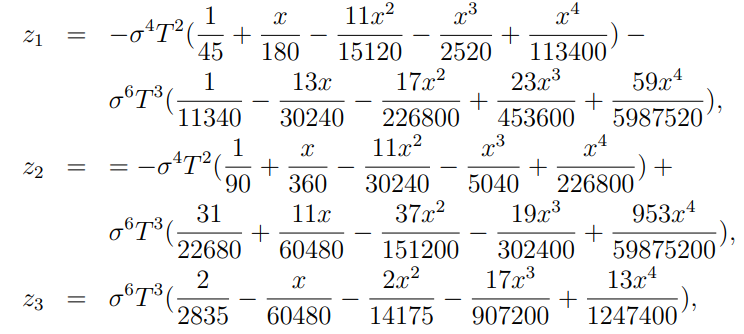  
   * Then we can apply BC's formular directly  
   $$ BC = e^{-rT} E[e^{X(1)}-K]^+ = [U_1e^{-rT}N(y_1)-Ke^{-rT}N(y_2)]+[e^{-rT}K(z_1p(y)+z_2\frac{dp(y)}{dy}+z_3\frac{d^2p(y)}{dy^2})]  \tag{1}$$
   

## Result test

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
# the route of local pyfeng
sys.path.insert(sys.path.index('')+1,  'D:\\Users\\13260\\Documents\\GitHub\\pyFENG')
import pyfeng as pf
import numpy as np

### values of continuous averageing calls (S = 100, r = 0.09, $\delta$= 0, T = 1)
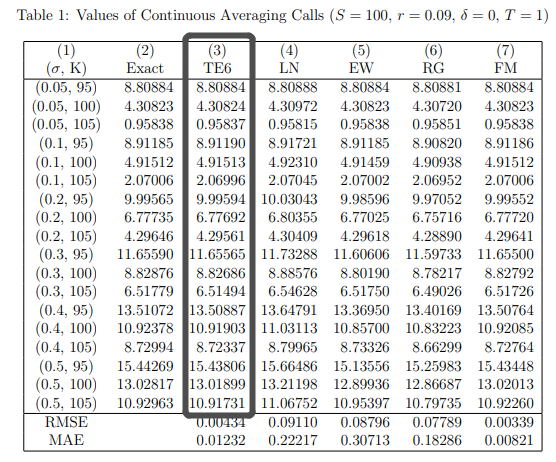

In [11]:
spot = 100
intr = 0.09
divr = 0
texp = 1
sigmas = [0.05] *3 +[0.1]*3 +[0.2]*3 +[0.3]*3 + [0.4]*3+[0.5]*3
strikes = [95,100,105] * 6
TE6 = []
for i in range(len(strikes)):
    continuous_call = pf.BsmContinuousAsianJu2002(sigmas[i], intr, divr)
    TE6.append(round(continuous_call.price(strikes[i], spot, texp, 1),5))
print(TE6)

[8.80884, 4.30824, 0.95837, 8.91189, 4.91512, 2.06996, 9.99568, 6.77677, 4.29564, 11.65472, 8.82648, 6.51519, 13.50689, 10.91849, 8.72438, 15.43505, 13.01889, 10.92026]


### values of continuous averageing calls (S = 100, r = 0.09, $\delta$= 0, T = 3)
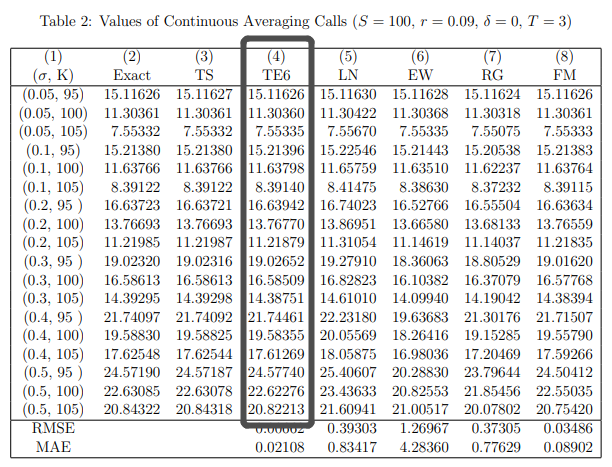

In [4]:
spot = 100
intr = 0.09
divr = 0
texp = 3
sigmas = [0.05] *3 +[0.1]*3 +[0.2]*3 +[0.3]*3 + [0.4]*3+[0.5]*3
strikes = [95,100,105] * 6
TE6 = []
for i in range(len(strikes)):
    continuous_call = pf.BsmContinuousAsianJu2002(sigmas[i], intr, divr)
    TE6.append(round(continuous_call.price(strikes[i], spot, texp, 1),5))
print(TE6)

[15.11626, 11.3036, 7.55334, 15.21388, 11.63787, 8.39128, 16.6376, 13.76613, 11.21772, 19.0202, 16.5806, 14.38533, 21.73338, 19.57765, 17.61265, 24.56715, 22.62367, 20.83474]


### values of the weekly averaging calls (S = 100, r = 0.09, $\delta$= 0, T = 3)
<img src = './weekly_call_result.png'>

In [5]:
spot = 100
intr = 0.09
divr = 0
texp = 3
strikes = [95,100,105] * 6
weight = [1/156]*156
sigmas = [0.05] *3 +[0.1]*3 +[0.2]*3 +[0.3]*3 + [0.4]*3+[0.5]*3
TE6 = []
for i in range(len(strikes)):
    asian_call = pf.BsmBasketAsianJu2002(np.full(156, sigmas[i]), 0, weight, intr, divr)
    TE6.append(round(asian_call.price(strikes[i], spot, texp, 1, False),4))
print(TE6)

[15.1197, 11.307, 7.5562, 15.2165, 11.6394, 8.3913, 16.6364, 13.7634, 11.2134, 19.0179, 16.5755, 14.3773, 21.7306, 19.5689, 17.5977, 24.5582, 22.6031, 20.8022]


### values of basket calls ($\delta$ = 0, T=1)
<img src = './basket_call_result1.png'>

In [6]:
spot = 100
intr = [0.05,0.1] *12
divr = 0
texp = 1
cor = [0, 0, 0, 0, 0.5, 0.5, 0.5, 0.5] *3
strikes = [90, 100, 110] * 8
weight = [0.05, 0.15, 0.2, 0.25, 0.35]
sigmas = [0.2, 0.2, 0.5, 0.5] *6
TE6 = []
for i in range(len(strikes)):
    basket_call = pf.BsmBasketAsianJu2002(np.full(5, sigmas[i]), cor[i], weight, intr[i], divr)
    TE6.append(round(basket_call.price(strikes[i], spot, texp, 1, True),4))
print(TE6)

[14.6259, 10.3087, 8.4268, 21.3083, 8.8933, 6.5272, 22.8738, 20.2014, 2.2071, 18.6286, 12.648, 10.5184, 15.6477, 11.9198, 13.8818, 25.381, 6.8154, 4.2396, 18.336, 15.2322, 4.3967, 19.2149, 17.9022, 15.9274]


### values of basket calls ($\delta$  = 0, T=3)
<img src = './basket_call_result3.png'>

In [7]:
spot = 100
intr = [0.05,0.1] *12
divr = 0
texp = 3
cor = [0, 0, 0, 0, 0.5, 0.5, 0.5, 0.5] *3
strikes = [90, 100, 110] * 8
weight = [0.05, 0.15, 0.2, 0.25, 0.35]
sigmas = [0.2, 0.2, 0.5, 0.5] *6
TE6 = []
for i in range(len(strikes)):
    basket_call = pf.BsmBasketAsianJu2002(np.full(5, sigmas[i]), cor[i], weight, intr[i], divr)
    TE6.append(round(basket_call.price(strikes[i], spot, texp, 1, True),4))
print(TE6)

[23.0148, 26.1706, 21.0437, 37.1973, 18.5812, 21.76, 36.8255, 38.5874, 9.8013, 33.3707, 25.1394, 27.619, 24.8111, 27.5463, 29.1026, 42.7625, 15.6802, 19.4357, 29.9817, 32.1032, 13.4905, 34.01, 32.7176, 34.8388]
